# Loading Libraries and Importing CSV 

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

# For XGB model
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# For F1 score, AUC-ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
cc_data_raw = pd.read_csv("cc_data.csv", encoding = 'utf-8', index_col=0) 
cc_data = cc_data_raw.drop(['ID','FLAG_MOBIL'], axis=1)
cc_data

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Gender,Has_Car,Has_Realty,REALTYPE
0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Unknown,2,1,1,1,0
1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Unknown,2,1,1,1,0
2,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,1,1,1,0
3,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,0,0,1,0
4,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-14234,-309,0,0,0,Core staff,3,0,1,1,0
36101,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-14234,-309,0,0,0,Core staff,3,0,1,1,0
36102,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-17713,-2441,0,0,0,Cooking staff,2,0,0,1,0
36103,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-17713,-2441,0,0,0,Cooking staff,2,0,0,1,0


## One-hot encoding

In [ ]:
cateogorical_var = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
           'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

cc_data_ohe = cc_data.copy()

for col in cateogorical_var:
    holder = cc_data_ohe[col].values.reshape(-1, 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    X = pd.DataFrame(onehot_encoder.fit_transform(holder))
    X.columns = onehot_encoder.get_feature_names_out([col])
    cc_data_ohe = cc_data_ohe.join(X)     

cc_data_num = cc_data_ohe.drop(cateogorical_var, axis=1)
cc_data_num

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Gender,Has_Car,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,0,427500.0,-12005,-4542,1,0,0,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,427500.0,-12005,-4542,1,0,0,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,112500.0,-21474,-1134,0,0,0,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,270000.0,-19110,-3051,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,270000.0,-19110,-3051,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,1,112500.0,-14234,-309,0,0,0,3,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36101,1,112500.0,-14234,-309,0,0,0,3,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36102,0,180000.0,-17713,-2441,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36103,0,180000.0,-17713,-2441,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split train, test data
`random_state=4` has been specified for model training and testing purposes, so that results returned are consistent even when running the model on separate occasions. 

In [ ]:
x = np.array(cc_data_num.loc[:, cc_data_num.columns !='REALTYPE']) 
y = np.array(cc_data_num.loc[:, 'REALTYPE'])

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                  test_size=0.2, stratify=y, random_state=4)

In [ ]:
print(Counter(y_train))
print(Counter(y_test))

estimate = Counter(y_train)[0] / Counter(y_train)[1]
print('Ratio: %.3f' % estimate)
print('X Train Shape: ', x_train.shape)
print('X Test Shape: ', x_test.shape)
print('Y Train Shape: ', y_train.shape)
print('Y Test Shape: ', y_test.shape)

Counter({0: 28673, 1: 211})
Counter({0: 7168, 1: 53})
Ratio: 135.891
X Train Shape:  (28884, 51)
X Test Shape:  (7221, 51)
Y Train Shape:  (28884,)
Y Test Shape:  (7221,)


# **RandomizedSearchCV**
Previously explored using **GridSearchCV** for hyperparameter tuning. However, after realising that it's a very brute force method, I switched to using **RandomizedSearchCV** for hyperparameter tuning.

In [ ]:
param_grid = { 
    'scale_pos_weight': [20, 40, 60],
    'learning_rate': [0.6, 0.7, 0.8, 0.9],
    'max_depth': [6, 7, 8, 9],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0.1, 0.2, 0.3],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0.05, 0.1, 0.5],
    'reg_lambda': [0.05, 0.1, 0.5]
    }

In [ ]:
random = RandomizedSearchCV(estimator=XGBClassifier(), 
                           param_distributions=param_grid, 
                           n_iter=45, n_jobs=-1)
random.fit(x_train, y_train)
print(random.best_params_)

{'scale_pos_weight': 60, 'reg_lambda': 0.1, 'reg_alpha': 0.05, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.9, 'gamma': 0.1, 'colsample_bytree': 0.8}


# **Check Performance of XGBClassifier**

## **No hyperparameters**
Without hyperparameter tuning, accuracy is very high at 99.2% due to the class imbalance in the data. 

F1-score returned is 0% as all the data is labelled as the majority class.

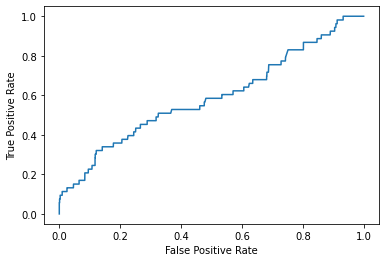

Train accuracy:  0.9926949176014402
Test accuracy:  0.9926602963578451
Area Under ROC Curve:  0.5894712874831537
F1 score:  0.0
Recall:  0.0
Precision:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

preds = XGB.predict(x_test)
y_pred = XGB.predict_proba(x_test)[:,1]
FPR, TPR, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(FPR, TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Train accuracy: ", metrics.accuracy_score(y_train, XGB.predict(x_train)))
print("Test accuracy: ", metrics.accuracy_score(y_test, preds))
print("Area Under ROC Curve: ", metrics.roc_auc_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, preds))
print("Recall: ", metrics.recall_score(y_test, preds))
print("Precision: ", metrics.precision_score(y_test, preds))


In [ ]:
train_preds = XGB.predict(x_train)
print("Test Set confusion matrix: \n", metrics.confusion_matrix(y_test, preds))
print("Train Set confusion matrix: \n", metrics.confusion_matrix(y_train, train_preds))

Test Set confusion matrix: 
 [[7168    0]
 [  53    0]]
Train Set confusion matrix: 
 [[28673     0]
 [  211     0]]


## **With hyperparameters**
With hyperparameter tuning, accuracy dropped slightly to 97.9% for the test set. However, accuracy is still very high due to class imbalance. Hence, looking at the recall, precision and F1-score is a better indication of how well the model does.
 
F1-score has increased compared to without any hyperparameter, with it being 21.2%, increasing from 0% previously, showing that the model is now able to accurately predict some on the minority class. 
 
We decided to look at the F1-score of our model, as we believe that only focusing on either Precision or Recall is not sufficient. Taking bad customers who are likely to default as positives, minimising both false-positives for Precision and false-negatives for Recall are essential for credit card approval situations. 


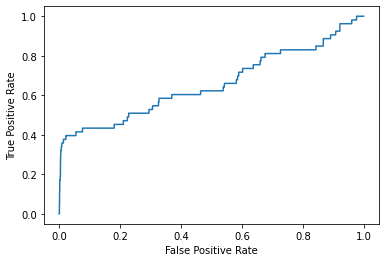

Train accuracy:  0.9847666528181692
Test accuracy:  0.9795042237917186
Area Under ROC Curve:  0.6582847245619945
F1 score:  0.2127659574468085
Recall:  0.37735849056603776
Precision:  0.14814814814814814


In [ ]:
XGB = XGBClassifier(**random.best_params_) 
XGB.fit(x_train, y_train)

preds = XGB.predict(x_test)
y_pred = XGB.predict_proba(x_test)[:,1]
FPR, TPR, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(FPR, TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Train accuracy: ", metrics.accuracy_score(y_train, XGB.predict(x_train)))
print("Test accuracy: ", metrics.accuracy_score(y_test, preds))
print("Area Under ROC Curve: ", metrics.roc_auc_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, preds))
print("Recall: ", metrics.recall_score(y_test, preds))
print("Precision: ", metrics.precision_score(y_test, preds))


In [ ]:
train_preds = XGB.predict(x_train)
print("Test Set confusion matrix: \n", metrics.confusion_matrix(y_test, preds))
print("Train Set confusion matrix: \n", metrics.confusion_matrix(y_train, train_preds))
print(random.best_params_)

Test Set confusion matrix: 
 [[7053  115]
 [  33   20]]
Train Set confusion matrix: 
 [[28233   440]
 [    0   211]]
{'scale_pos_weight': 60, 'reg_lambda': 0.1, 'reg_alpha': 0.05, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.9, 'gamma': 0.1, 'colsample_bytree': 0.8}


# **Previously Done**
Previously tried out some sampling techniques, such as SMOTE oversampling and random undersampling. Other Normalisation techniques that were attempted are data scaling, checking feature importance and removing highly correlated variables.

However, most of these returned results will lower F1-scores than simply using the base XGBClassifier model, and they have been removed.

## Feature Engineering + Correlation

In [ ]:
cc_data_fe=cc_data.copy(deep=True)
cc_data_fe['Income_Per_Fam_Memeber']=cc_data_fe['AMT_INCOME_TOTAL']/cc_data_fe['CNT_FAM_MEMBERS']

In [ ]:
cc_data_fe['NAME_FAMILY_STATUS'].value_counts()

Married                 24837
Single / not married     4760
Civil marriage           2915
Separated                2090
Widow                    1503
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
cc_data_fe['Legal_Married']=cc_data_fe['NAME_FAMILY_STATUS'].replace(
    ['Civil marriage','Married','Single / not married','Separated','Widow'],
    [1,1,0,0,0])
cc_data_fe=cc_data_fe.drop('NAME_FAMILY_STATUS', axis=1)

In [ ]:
cc_data_fe['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    24536
Higher education                  9769
Incomplete higher                 1398
Lower secondary                    370
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
cc_data_fe['Higher_Education']=cc_data_fe['NAME_EDUCATION_TYPE'].replace(
    ['Higher education','Secondary / secondary special','Incomplete higher','Lower secondary','Academic degree'],
    [1,0,1,0,1])
cc_data_fe=cc_data_fe.drop('NAME_EDUCATION_TYPE', axis=1)

In [ ]:
cc_data_fe['NAME_HOUSING_TYPE'].value_counts()

House / apartment      32248
With parents            1761
Municipal apartment     1102
Rented apartment         571
Office apartment         257
Co-op apartment          166
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
cc_data_fe['Own_house']=cc_data_fe['NAME_HOUSING_TYPE'].replace(
    ['House / apartment', 'With parents', 'Municipal apartment', 
    'Rented apartment', 'Office apartment', 'Co-op apartment'],
    [1,0,1,1,1,1])
cc_data_fe=cc_data_fe.drop('NAME_HOUSING_TYPE', axis=1)

In [ ]:
# Finding correlation 
corr_matrix = cc_data_fe.corr().abs()
# Upper triagle
upper_corr_mat = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
sorted_mat[sorted_mat > 0.75]

CNT_FAM_MEMBERS  CNT_CHILDREN    0.88985
dtype: float64

In [ ]:
# Dropping one of the highly correlated variables 
cc_data_fe=cc_data_fe.drop(['CNT_CHILDREN'], axis=1)

In [ ]:
cc_data_fe

,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Gender,Has_Car,Has_Realty,REALTYPE,Income_Per_Fam_Memeber,Legal_Married,Higher_Education,Own_house
0,427500.0,Working,-12005,-4542,1,0,0,Unknown,2,1,1,1,0,213750.0,1,1,1
1,427500.0,Working,-12005,-4542,1,0,0,Unknown,2,1,1,1,0,213750.0,1,1,1
2,112500.0,Working,-21474,-1134,0,0,0,Security staff,2,1,1,1,0,56250.0,1,0,1
3,270000.0,Commercial associate,-19110,-3051,0,1,1,Sales staff,1,0,0,1,0,270000.0,0,0,1
4,270000.0,Commercial associate,-19110,-3051,0,1,1,Sales staff,1,0,0,1,0,270000.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,112500.0,Working,-14234,-309,0,0,0,Core staff,3,0,1,1,0,37500.0,1,0,1
36101,112500.0,Working,-14234,-309,0,0,0,Core staff,3,0,1,1,0,37500.0,1,0,1
36102,180000.0,Working,-17713,-2441,0,0,0,Cooking staff,2,0,0,1,0,90000.0,1,0,1
36103,180000.0,Working,-17713,-2441,0,0,0,Cooking staff,2,0,0,1,0,90000.0,1,0,1


## SMOTE oversampling

In [ ]:
from imblearn.over_sampling import SMOTENC 
smote_oversample  = SMOTENC(categorical_features=range(12,51), sampling_strategy=0.05, random_state=4)
x_train_smote, y_train_smote = smote_oversample.fit_resample(x_train, y_train)

In [ ]:
print(Counter(y_train_smote))
print(Counter(y_test))

estimate = Counter(y_train_smote)[0] / Counter(y_train_smote)[1]
print('Ratio: %.3f' % estimate)
print('X Train Shape: ', x_train_smote.shape)
print('X Test Shape: ', x_test.shape)
print('Y Train Shape: ', y_train_smote.shape)
print('Y Test Shape: ', y_test.shape)

Counter({0: 28673, 1: 1433})
Counter({0: 7168, 1: 53})
Ratio: 20.009
X Train Shape:  (30106, 51)
X Test Shape:  (7221, 51)
Y Train Shape:  (30106,)
Y Test Shape:  (7221,)


In [ ]:
random_SMOTE = RandomizedSearchCV(estimator=XGBClassifier(), 
                           param_distributions=param_grid, 
                           n_iter=40, n_jobs=-1)
random_SMOTE.fit(x_train_smote, y_train_smote)
print(random_SMOTE.best_params_)

{'scale_pos_weight': 60, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.6, 'gamma': 0.1, 'colsample_bytree': 0.9}


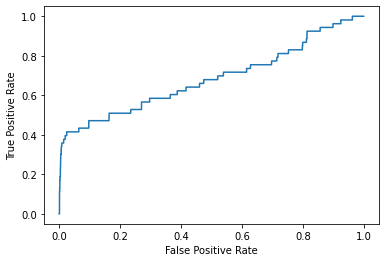

Train accuracy:  0.9853849730950641
Test accuracy:  0.9790887688685778
Area Under ROC Curve:  0.6841188826650944
F1 score:  0.2094240837696335
Recall:  0.37735849056603776
Precision:  0.14492753623188406


In [ ]:
XGB_smote = XGBClassifier(**random_SMOTE.best_params_) 
XGB_smote.fit(x_train_smote, y_train_smote)

preds = XGB_smote.predict(x_test)
y_pred = XGB_smote.predict_proba(x_test)[:,1]
FPR, TPR, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(FPR, TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Train accuracy: ", metrics.accuracy_score(y_train_smote, XGB_smote.predict(x_train_smote)))
print("Test accuracy: ", metrics.accuracy_score(y_test, preds))
print("Area Under ROC Curve: ", metrics.roc_auc_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, preds))
print("Recall: ", metrics.recall_score(y_test, preds))
print("Precision: ", metrics.precision_score(y_test, preds))


## Checking Feature Importance

In [ ]:
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

df_fi = pd.DataFrame(XGB.feature_importances_,
                     cc_data_num.loc[:, cc_data_num.columns !='REALTYPE'].columns)
least_imp = []
for i in range(len(XGB.feature_importances_)):
    if XGB.feature_importances_[i] < 0.03:
        least_imp += [i,]
print(least_imp)
print(df_fi.iloc[least_imp])

[7, 8, 9, 12, 14, 15, 16, 18, 19, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 50]
                                              0
CNT_FAM_MEMBERS                        0.029652
Gender                                 0.029108
Has_Car                                0.025555
NAME_INCOME_TYPE_Pensioner             0.000000
NAME_INCOME_TYPE_Student               0.000000
NAME_INCOME_TYPE_Working               0.000000
NAME_EDUCATION_TYPE_Academic degree    0.000000
NAME_EDUCATION_TYPE_Incomplete higher  0.016176
NAME_EDUCATION_TYPE_Lower secondary    0.018107
NAME_FAMILY_STATUS_Civil marriage      0.000000
NAME_FAMILY_STATUS_Married             0.000000
NAME_FAMILY_STATUS_Widow               0.023592
NAME_HOUSING_TYPE_Co-op apartment      0.000000
NAME_HOUSING_TYPE_House / apartment    0.010715
NAME_HOUSING_TYPE_Municipal apartment  0.022977
NAME_HOUSING_TYPE_Office apartment     0.020230
NAME_HOUSING_TYPE_Rented apartment     0.000000
NA

In [ ]:
x_train_fi = np.delete(x_train, least_imp, axis=1)
x_test_fi = np.delete(x_test, least_imp, axis=1)

print(x_train_fi.shape)
print(x_test_fi.shape)

(28884, 17)
(7221, 17)


## **GridSearchCV**
Used a list `best_parameters` which is updated as each iteration of **GridSearchCV** was done. 

In [ ]:
best_parameters = {}

### GridSearchCV for **scale_pos_weight** and **learning_rate**

In [ ]:
param_test = {
    'scale_pos_weight':[20, 40, 60],
    'learning_rate':[1.0, 1.2, 1.4]
}

grid = GridSearchCV(estimator=XGBClassifier(**best_parameters), 
                     param_grid=param_test, n_jobs=-1) 

grid.fit(x_train, y_train)
best_parameters.update(grid.best_params_)
print(grid.best_params_)
print(best_parameters)

{'learning_rate': 1.0, 'scale_pos_weight': 20}
{'learning_rate': 1.0, 'scale_pos_weight': 20}


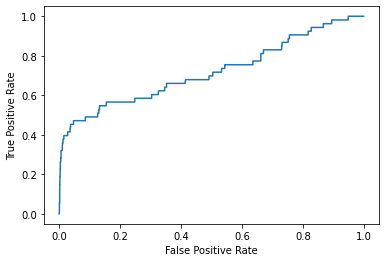

Train accuracy:  0.9829317269076305
Test accuracy:  0.9763190693809721
Area Under ROC Curve:  0.7192211716644205
F1 score:  0.1971830985915493
Recall:  0.39622641509433965
Precision:  0.13125


In [ ]:
preds = grid.predict(x_test)
y_pred = grid.predict_proba(x_test)[:,1]
FPR, TPR, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(FPR, TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Train accuracy: ", metrics.accuracy_score(y_train, grid.predict(x_train)))
print("Test accuracy: ", metrics.accuracy_score(y_test, preds))
print("Area Under ROC Curve: ", metrics.roc_auc_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, preds))
print("Recall: ", metrics.recall_score(y_test, preds))
print("Precision: ", metrics.precision_score(y_test, preds))

### GridSearchCV for **max_depth** and **min_child_weight**
Fixing *scale_pos_weight* and *learning_rate* 

In [ ]:
param_test = {
    'max_depth':[4,5,6],
    'min_child_weight':[2,3,4]
}

grid = GridSearchCV(estimator=XGBClassifier(**best_parameters), 
                     param_grid=param_test, n_jobs=-1) 

grid.fit(x_train, y_train)
best_parameters.update(grid.best_params_)
print(grid.best_params_)
print(best_parameters)

{'max_depth': 6, 'min_child_weight': 2}
{'learning_rate': 1.0, 'scale_pos_weight': 20, 'max_depth': 6, 'min_child_weight': 2}


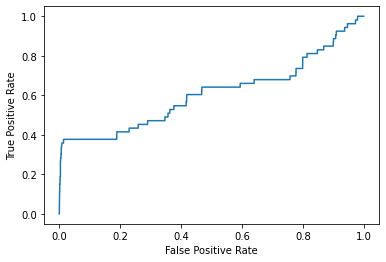

Train accuracy:  0.9847666528181692
Test accuracy:  0.9793657388173383
Area Under ROC Curve:  0.6076614091981132
F1 score:  0.21164021164021166
Recall:  0.37735849056603776
Precision:  0.14705882352941177


In [ ]:
preds = grid.predict(x_test)
y_pred = grid.predict_proba(x_test)[:,1]
FPR, TPR, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(FPR, TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Train accuracy: ", metrics.accuracy_score(y_train, grid.predict(x_train)))
print("Test accuracy: ", metrics.accuracy_score(y_test, preds))
print("Area Under ROC Curve: ", metrics.roc_auc_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, preds))
print("Recall: ", metrics.recall_score(y_test, preds))
print("Precision: ", metrics.precision_score(y_test, preds))

### GridSearchCV for **subsample** and **colsample_bytree**
Fixing *scale_pos_weight*, *learning_rate*, *max_depth* and *min_child_weight*

In [ ]:
param_test = {
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.8,0.9,1.0]
}

grid = GridSearchCV(estimator=XGBClassifier(**best_parameters), 
                     param_grid=param_test, n_jobs=-1) 

grid.fit(x_train, y_train)
best_parameters.update(grid.best_params_)
print(grid.best_params_)
print(best_parameters)

{'colsample_bytree': 0.9, 'subsample': 1.0}
{'learning_rate': 1.0, 'scale_pos_weight': 20, 'max_depth': 6, 'min_child_weight': 2, 'colsample_bytree': 0.9, 'subsample': 1.0}


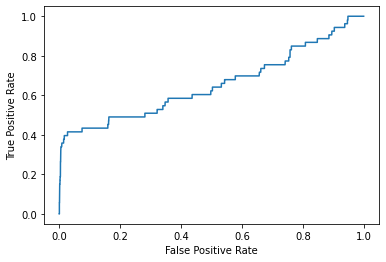

Train accuracy:  0.9847666528181692
Test accuracy:  0.9793657388173383
Area Under ROC Curve:  0.6537914841644206
F1 score:  0.21164021164021166
Recall:  0.37735849056603776
Precision:  0.14705882352941177


In [ ]:
preds = grid.predict(x_test)
y_pred = grid.predict_proba(x_test)[:,1]
FPR, TPR, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(FPR, TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Train accuracy: ", metrics.accuracy_score(y_train, grid.predict(x_train)))
print("Test accuracy: ", metrics.accuracy_score(y_test, preds))
print("Area Under ROC Curve: ", metrics.roc_auc_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, preds))
print("Recall: ", metrics.recall_score(y_test, preds))
print("Precision: ", metrics.precision_score(y_test, preds))

### GridSearchCV for **reg_alpha** and **gamma**
Fixing *scale_pos_weight*, *learning_rate*, *max_depth*, *min_child_weight*, *subsample* and *colsample_bytree*

In [ ]:
param_test = {
    'reg_alpha':[0.05,0.06,0.07],
    'gamma':[0,0.2,0.4]
}

grid = GridSearchCV(estimator=XGBClassifier(**best_parameters), 
                    param_grid=param_test, n_jobs=-1) 

grid.fit(x_train, y_train)
best_parameters.update(grid.best_params_)
print(grid.best_params_)
print(best_parameters)

{'gamma': 0, 'reg_alpha': 0.05}
{'learning_rate': 1.0, 'scale_pos_weight': 20, 'max_depth': 6, 'min_child_weight': 2, 'colsample_bytree': 0.9, 'subsample': 1.0, 'gamma': 0, 'reg_alpha': 0.05}


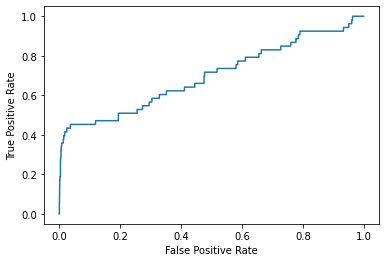

Train accuracy:  0.9847666528181692
Test accuracy:  0.9793657388173383
Area Under ROC Curve:  0.6976222940532345
F1 score:  0.2198952879581152
Recall:  0.39622641509433965
Precision:  0.15217391304347827


In [ ]:
preds = grid.predict(x_test)
y_pred = grid.predict_proba(x_test)[:,1]
FPR, TPR, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(FPR, TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Train accuracy: ", metrics.accuracy_score(y_train, grid.predict(x_train)))
print("Test accuracy: ", metrics.accuracy_score(y_test, preds))
print("Area Under ROC Curve: ", metrics.roc_auc_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, preds))
print("Recall: ", metrics.recall_score(y_test, preds))
print("Precision: ", metrics.precision_score(y_test, preds))

### Final model after **GridSearchCV**

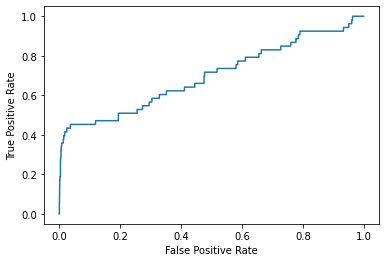

Train accuracy:  0.9847666528181692
Test accuracy:  0.9793657388173383
Area Under ROC Curve:  0.6976222940532345
F1 score:  0.2198952879581152
Recall:  0.39622641509433965
Precision:  0.15217391304347827


In [ ]:
XGB_grid = XGBClassifier(**best_parameters) 
XGB_grid.fit(x_train, y_train)

preds = XGB_grid.predict(x_test)
y_pred = XGB_grid.predict_proba(x_test)[:,1]
FPR, TPR, _ = metrics.roc_curve(y_test,  y_pred)

plt.plot(FPR, TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Train accuracy: ", metrics.accuracy_score(y_train, XGB_grid.predict(x_train)))
print("Test accuracy: ", metrics.accuracy_score(y_test, preds))
print("Area Under ROC Curve: ", metrics.roc_auc_score(y_test, y_pred))
print("F1 score: ", metrics.f1_score(y_test, preds))
print("Recall: ", metrics.recall_score(y_test, preds))
print("Precision: ", metrics.precision_score(y_test, preds))


In [ ]:
train_preds = XGB_grid.predict(x_train)
print("Test Set confusion matrix: \n", metrics.confusion_matrix(y_test, preds))
print("Train Set confusion matrix: \n", metrics.confusion_matrix(y_train, train_preds))
print(random.best_params_)

Test Set confusion matrix: 
 [[7051  117]
 [  32   21]]
Train Set confusion matrix: 
 [[28233   440]
 [    0   211]]
{'scale_pos_weight': 60, 'reg_lambda': 0.1, 'reg_alpha': 0.05, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.9, 'gamma': 0.1, 'colsample_bytree': 0.8}
